In [1]:
/#Importing useful libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
import zipfile36 as zipfile
import warnings

warnings.filterwarnings("ignore")

In [2]:
#Downloading Dataset zip file using Kaggle Api
!kaggle datasets download -d rajkumarpandey02/human-development-index-and-components

human-development-index-and-components.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
#Extracting from zip file
zipfile_name ="human-development-index-and-components.zip"
with zipfile.ZipFile(zipfile_name, "r") as file:
    file.extractall()

In [28]:
df = pd.read_csv("Human Development Index and Components.csv", encoding='latin-1')

In [29]:
df.head()

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1,Unnamed: 10,Unnamed: 11
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,"66,933",5,3,NaN,NaN
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,"64,660",6,1,NaN,NaN
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,"55,782",11,2,NaN,NaN
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,"62,607",6,4,NaN,NaN
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,"49,238",18,5,NaN,NaN


In [30]:
df.drop(labels=["Unnamed: 10", "Unnamed: 11"], axis=1, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   HDI rank                                195 non-null    int64  
 1   Country                                 195 non-null    object 
 2   HUMAN DEVELOPMENT                       195 non-null    object 
 3   Human Development Index (HDI)           195 non-null    object 
 4   Life expectancy at birth                195 non-null    float64
 5   Expected years of schooling             195 non-null    object 
 6   Mean years of schooling                 195 non-null    object 
 7   Gross national income (GNI) per capita  195 non-null    object 
 8   GNI per capita rank minus HDI rank      195 non-null    object 
 9   HDI rank.1                              195 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 15.4+ KB


In [32]:
df["HUMAN DEVELOPMENT"].value_counts()

VERY HIGH     66
HIGH          49
MEDIUM        44
LOW           32
OTHER          4
Name: HUMAN DEVELOPMENT, dtype: int64

In [33]:
# Dropping Rows where Human Development Index (HDI) value is not available
df = df[df["Human Development Index (HDI) "]!='..']

In [34]:
df[df["Human Development Index (HDI) "]=='..']

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,HDI rank.1


In [35]:
# Converting Columns into correct data types

data_type_dict = {"HUMAN DEVELOPMENT": "category", 
                  "Human Development Index (HDI) ":"float64",
                 "Expected years of schooling": "float64", 
                  "Mean years of schooling": "float64",
                 "GNI per capita rank minus HDI rank":"int64", 
                 "HDI rank.1":"int64"
                 }

df = df.astype(data_type_dict)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   HDI rank                                191 non-null    int64   
 1   Country                                 191 non-null    object  
 2   HUMAN DEVELOPMENT                       191 non-null    category
 3   Human Development Index (HDI)           191 non-null    float64 
 4   Life expectancy at birth                191 non-null    float64 
 5   Expected years of schooling             191 non-null    float64 
 6   Mean years of schooling                 191 non-null    float64 
 7   Gross national income (GNI) per capita  191 non-null    object  
 8   GNI per capita rank minus HDI rank      191 non-null    int64   
 9   HDI rank.1                              191 non-null    int64   
dtypes: category(1), float64(4), int64(3), object(2)
me

In [37]:
df.rename(columns={"HDI rank.1":"Previous Year HDI"}, inplace=True)

In [38]:
df.head()

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Previous Year HDI
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,"66,933",5,3
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,"64,660",6,1
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,"55,782",11,2
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,"62,607",6,4
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,"49,238",18,5


In [39]:
df["Gross national income (GNI) per capita"] = df["Gross national income (GNI) per capita"].str.replace(",","")

In [40]:
df = df.astype({"Gross national income (GNI) per capita":"int64"})

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   HDI rank                                191 non-null    int64   
 1   Country                                 191 non-null    object  
 2   HUMAN DEVELOPMENT                       191 non-null    category
 3   Human Development Index (HDI)           191 non-null    float64 
 4   Life expectancy at birth                191 non-null    float64 
 5   Expected years of schooling             191 non-null    float64 
 6   Mean years of schooling                 191 non-null    float64 
 7   Gross national income (GNI) per capita  191 non-null    int64   
 8   GNI per capita rank minus HDI rank      191 non-null    int64   
 9   Previous Year HDI                       191 non-null    int64   
dtypes: category(1), float64(4), int64(4), object(1)
me

In [42]:
top_5_countries = df[:5]

In [43]:
top_5_countries

,HDI rank,Country,HUMAN DEVELOPMENT,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,GNI per capita rank minus HDI rank,Previous Year HDI
0,1,Switzerland,VERY HIGH,0.962,84.0,16.5,13.9,66933,5,3
1,2,Norway,VERY HIGH,0.961,83.2,18.2,13.0,64660,6,1
2,3,Iceland,VERY HIGH,0.959,82.7,19.2,13.8,55782,11,2
3,4,"Hong Kong, China (SAR)",VERY HIGH,0.952,85.5,17.3,12.2,62607,6,4
4,5,Australia,VERY HIGH,0.951,84.5,21.1,12.7,49238,18,5


In [44]:
sns.set_style("darkgrid")

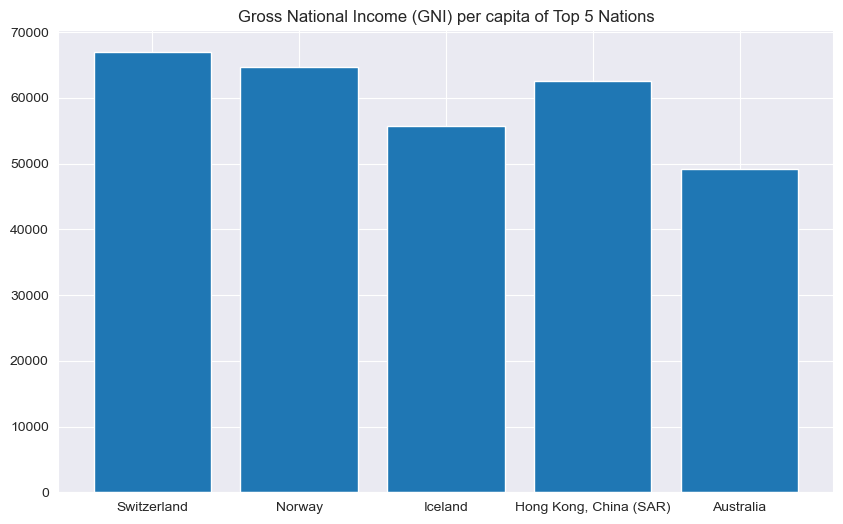

In [45]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Gross National Income (GNI) per capita of Top 5 Nations")
plt.bar(x="Country",
        height="Gross national income (GNI) per capita",
       data=top_5_countries)
plt.show();

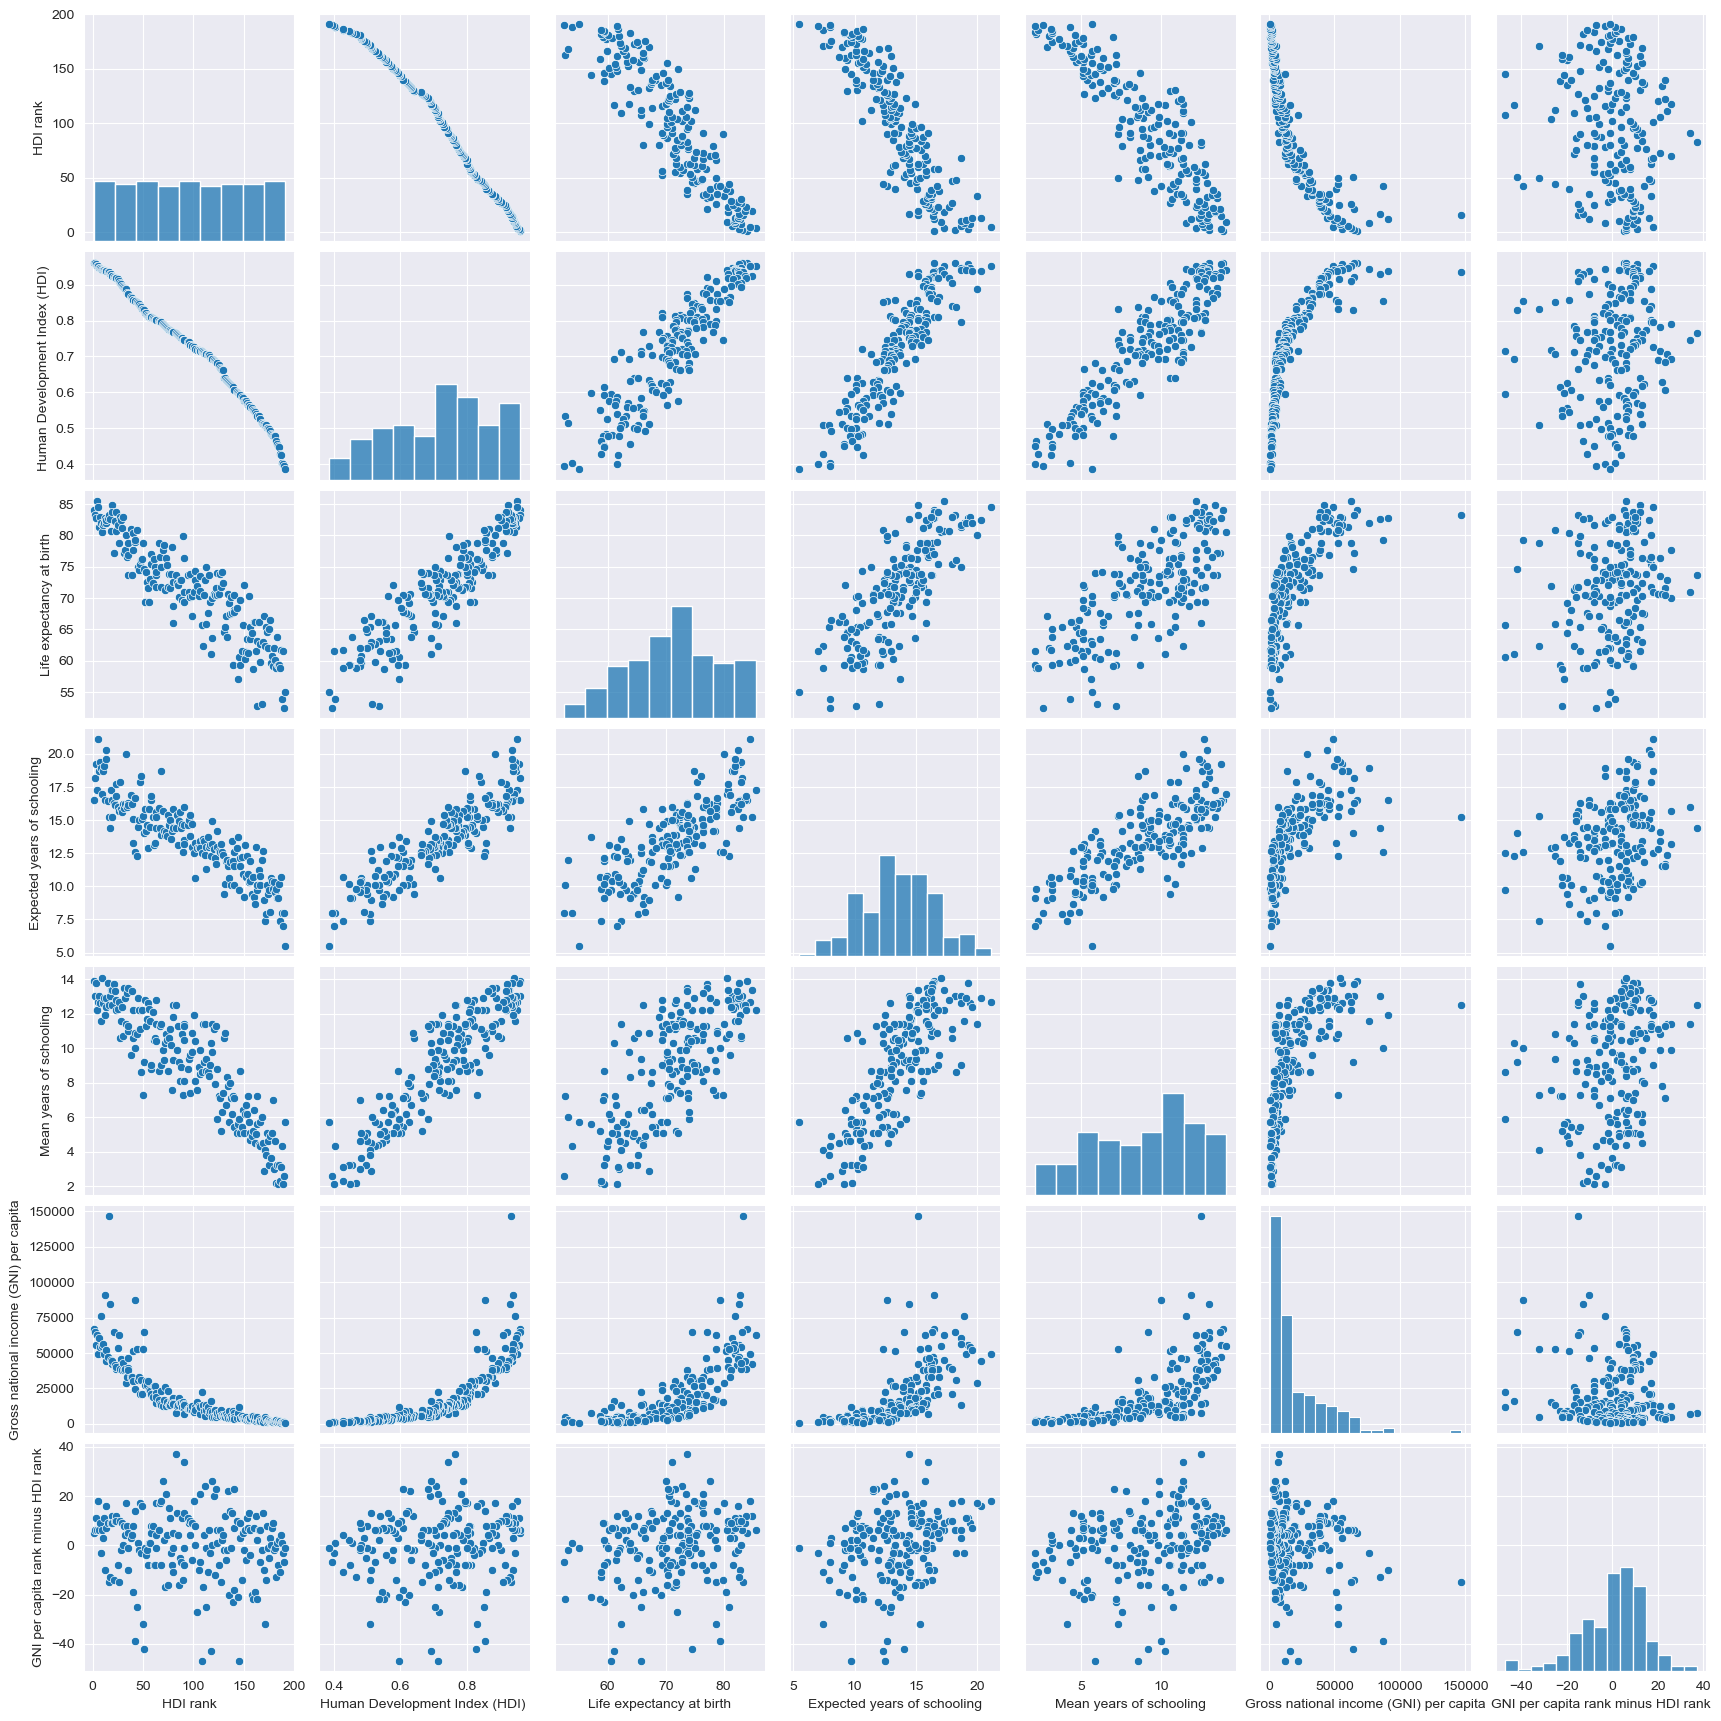

In [56]:
sns.pairplot(data = df.iloc[:, :-1])

# REGIONAL IMPACT EVALUATION



Assessing Development Indicators Across Different Regions

In [57]:
# Define the regions and their respective countries
regions = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cabo Verde', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Congo (Democratic Republic of the)', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini (Kingdom of)', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'China', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Korea (Democratic People\'s Republic of)', 'Korea (Republic of)', 'Kuwait', 'Kyrgyzstan', 'Lao People\'s Democratic Republic', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Palau', 'Philippines', 'Qatar', 'Russian Federation', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia (Federated States of)', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'The Caribbean': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Cuba', 'Dominica', 'Dominican Republic', 'Grenada', 'Guyana', 'Haiti', 'Jamaica', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname', 'Trinidad and Tobago'],
    'North America': ['Canada', 'United States'],
    'Central America': ['Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Panama'],
    'South America': ['Argentina', 'Bolivia (Plurinational State of)', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela (Bolivarian Republic of)']
}

In [62]:
df["Region"] = df["Country"].map({country:region for region, countries in regions.items() for country in countries})

In [132]:
df_life_expectancy_at_birth_region = (df
                                      .groupby("Region")
                                      .agg({"Life expectancy at birth":"mean"})
                                      .sort_values("Life expectancy at birth", ascending=False)
                                     )

In [133]:
df_life_expectancy_at_birth_region

,Life expectancy at birth
Region,
North America,79.950000
Europe,79.030000
Asia,72.962791
South America,72.590000
Central America,72.457143
The Caribbean,71.706250
Oceania,70.607692
Africa,62.774510


In [128]:
df_life_expectancy_at_birth_region = df_life_expectancy_at_birth_region.applymap(lambda x: round(x, 2))

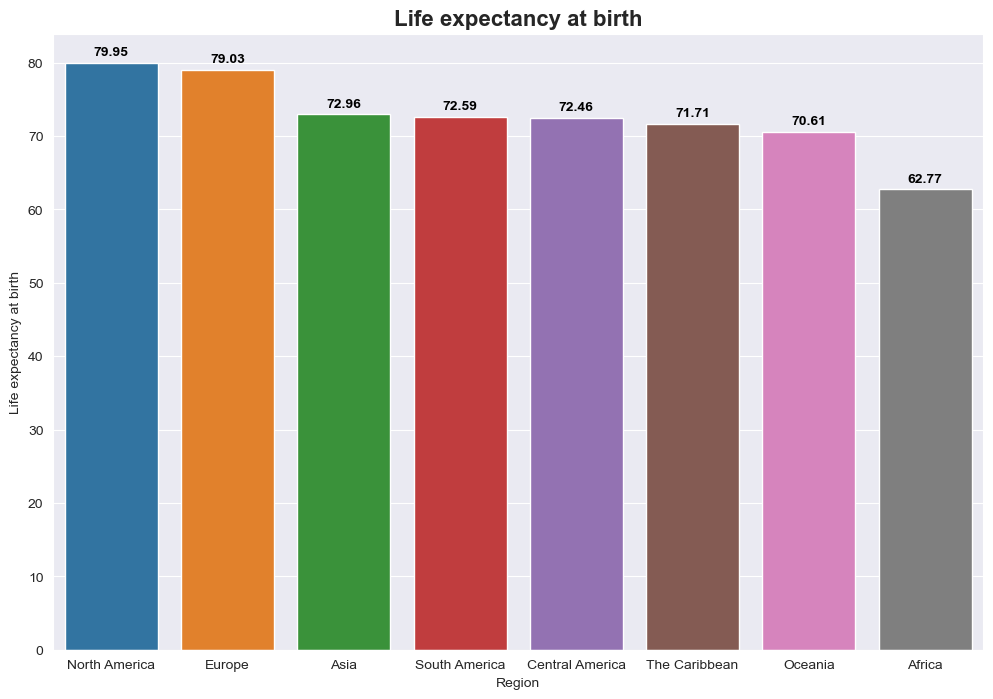

In [145]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_title("Life expectancy at birth", fontsize=16, fontweight="bold")
ax = sns.barplot(x=df_life_expectancy_at_birth_region.index,
           y=df_life_expectancy_at_birth_region["Life expectancy at birth"],
            data=df_life_expectancy_at_birth_region
           )
for i, v in enumerate(df_life_expectancy_at_birth_region["Life expectancy at birth"]):
    ax.text(i, v+1, str(v), ha='center', color='black', fontweight="bold")

In [135]:
df_life_expectancy_at_birth_region["Life expectancy at birth"] = round(df_life_expectancy_at_birth_region["Life expectancy at birth"], 2)
                                                                  

In [136]:
df_life_expectancy_at_birth_region

,Life expectancy at birth
Region,
North America,79.95
Europe,79.03
Asia,72.96
South America,72.59
Central America,72.46
The Caribbean,71.71
Oceania,70.61
Africa,62.77


In [2]:
top_5_countries.corr()

NameError: name 'top_5_countries' is not defined